# Drivers of Density Group
OOI Data Labs Workshop - August 2019

Revised Oct 15, 2020

**Working Title**: Drivers of Seawater Density

**Short Description**: Observe how temperature, salinity influence density at three locations.

In [ ]:
# Notebook Setup
import xarray as xr
!pip install netcdf4
import matplotlib.pyplot as plt

# Setup default plot styles
import seaborn as sns
sns.set()

# Supress open_mfdataset warnings
import warnings
warnings.filterwarnings('ignore')

     |████████████████████████████████| 4.3MB 2.8MB/s 
     |████████████████████████████████| 296kB 25.1MB/s 


## 1. Request Data from OOINet

**Instruments:** 
* GP03FLMA-RIM01-02-CTDMOG040 - Station Papa Flanking Mooring A (30m) 
* CE06ISSM-SBD17-06-CTDBPC000 - Washington Inshore Surface Mooring (1m)
* CP04OSSM-RID27-03-CTDBPC000 - Pioneer Offshore Surface Mooring (7m)
* GI03FLMA-RIM01-02-CTDMOG040 - Irminger Sea Flanking Mooring A (30m)

**Other Options**
* CE01ISSM-RID16-03-CTDBPC000 - Oregon Inshore Surface Mooring (7m) - This dataset is provided as an alternative.  An instrument that is closer to the Columbia River is preferred (e.g. CE06).
* CE06ISSM-RID16-03-CTDBPC000 - Washington Inshore Surface Mooring (7m) - Unfortunately, much of the data during the desired period isn't good.  This mooring also has CTDs at 1m (which we will use) and 25m (which is also gappy).

**Time range:** 
* First draft: 2016-07-01 00:00:00 to 2017-02-01 00:00:00
* Second version: 2018-07-01 00:00:00 to 2019-02-01 00:00:00
* Final version: 2018-07-01 00:00:00 to 2019-09-01 00:00:00


This notebook will utilize the new `ooilab` library I have developed to limit the code needed in this notebook.

In [ ]:
!pip install git+https://github.com/seagrinch/ooilab.git
import ooilab

  Cloning https://github.com/seagrinch/ooilab.git to /tmp/pip-req-build-s6whuaxw
  Running command git clone -q https://github.com/seagrinch/ooilab.git /tmp/pip-req-build-s6whuaxw
  Created wheel for ooilab: filename=ooilab-0.2-cp36-none-any.whl size=2506 sha256=1ed526dbdfd98001b139f22877524044235be1f1dd8d6d2e5f60bc2ea42bbf29
  Stored in directory: /tmp/pip-ephem-wheel-cache-alupnqcb/wheels/7f/c9/1d/60f91d31a29c5e03e8bc9dd7a58918a976a3f2ffe1ffcb3ea1
Successfully built ooilab


In [ ]:
ooilab.API_USERNAME = ''
ooilab.API_TOKEN = ''

In [ ]:
# Data Requests
# ooilab.request_data('GP03FLMA-RIM01-02-CTDMOG040','recovered_inst','ctdmo_ghqr_instrument_recovered',
#              '2018-07-01T00:00:00.000Z','2019-09-01T00:00:00.000Z')
# ooilab.request_data('CE06ISSM-SBD17-06-CTDBPC000','recovered_inst','ctdbp_cdef_instrument_recovered',
#              '2018-07-01T00:00:00.000Z','2019-09-01T00:00:00.000Z')
# ooilab.request_data('CP04OSSM-RID27-03-CTDBPC000','telemetered','ctdbp_cdef_dcl_instrument',
#              '2018-07-01T00:00:00.000Z','2019-09-01T00:00:00.000Z')
# ooilab.request_data('GI03FLMA-RIM01-02-CTDMOG040','recovered_inst','ctdmo_ghqr_instrument_recovered',
#              '2018-07-01T00:00:00.000Z','2019-09-01T00:00:00.000Z')
# ooilab.request_data('CE01ISSM-RID16-03-CTDBPC000','recovered_inst','ctdbp_cdef_instrument_recovered',
#              '2018-07-01T00:00:00.000Z','2019-09-01T00:00:00.000Z')

## 2. Load Data Files

In [ ]:
# End 2/1/19
# url_gp03 = 'https://opendap.oceanobservatories.org/thredds/catalog/ooi/sage@marine.rutgers.edu/20201015T174923207Z-GP03FLMA-RIM01-02-CTDMOG040-recovered_inst-ctdmo_ghqr_instrument_recovered/catalog.html'
# url_ce06 = 'https://opendap.oceanobservatories.org/thredds/catalog/ooi/sage@marine.rutgers.edu/20201015T174935564Z-CE06ISSM-RID16-03-CTDBPC000-recovered_host-ctdbp_cdef_dcl_instrument_recovered/catalog.html'
# url_cp04 = 'https://opendap.oceanobservatories.org/thredds/catalog/ooi/sage@marine.rutgers.edu/20201015T174946979Z-CP04OSSM-RID27-03-CTDBPC000-telemetered-ctdbp_cdef_dcl_instrument/catalog.html'
# url_gi03 = 'https://opendap.oceanobservatories.org/thredds/catalog/ooi/sage@marine.rutgers.edu/20201015T175004003Z-GI03FLMA-RIM01-02-CTDMOG040-recovered_inst-ctdmo_ghqr_instrument_recovered/catalog.html'
# url_ce01 = 'https://opendap.oceanobservatories.org/thredds/catalog/ooi/sage@marine.rutgers.edu/20201015T175018314Z-CE01ISSM-RID16-03-CTDBPC000-recovered_inst-ctdbp_cdef_instrument_recovered/catalog.html'

In [ ]:
# End 9/1/2019
url_gp03 = 'https://opendap.oceanobservatories.org/thredds/catalog/ooi/sage@marine.rutgers.edu/20201015T202245902Z-GP03FLMA-RIM01-02-CTDMOG040-recovered_inst-ctdmo_ghqr_instrument_recovered/catalog.html'
url_ce06 = 'https://opendap.oceanobservatories.org/thredds/catalog/ooi/sage@marine.rutgers.edu/20201015T202325073Z-CE06ISSM-SBD17-06-CTDBPC000-recovered_inst-ctdbp_cdef_instrument_recovered/catalog.html'
url_cp04 = 'https://opendap.oceanobservatories.org/thredds/catalog/ooi/sage@marine.rutgers.edu/20201015T202340150Z-CP04OSSM-RID27-03-CTDBPC000-telemetered-ctdbp_cdef_dcl_instrument/catalog.html'
url_gi03 = 'https://opendap.oceanobservatories.org/thredds/catalog/ooi/sage@marine.rutgers.edu/20201015T202353019Z-GI03FLMA-RIM01-02-CTDMOG040-recovered_inst-ctdmo_ghqr_instrument_recovered/catalog.html'
url_ce01 = 'https://opendap.oceanobservatories.org/thredds/catalog/ooi/sage@marine.rutgers.edu/20201015T202403433Z-CE01ISSM-RID16-03-CTDBPC000-recovered_inst-ctdbp_cdef_instrument_recovered/catalog.html'

In [ ]:
# Load Data
data_gp03 = xr.open_mfdataset(ooilab.get_filelist(url_gp03)).swap_dims({'obs': 'time'}).sortby('time')
data_ce06 = xr.open_mfdataset(ooilab.get_filelist(url_ce06)).swap_dims({'obs': 'time'}).sortby('time')
data_cp04 = xr.open_mfdataset(ooilab.get_filelist(url_cp04)).swap_dims({'obs': 'time'}).sortby('time')
data_gi03 = xr.open_mfdataset(ooilab.get_filelist(url_gi03)).swap_dims({'obs': 'time'}).sortby('time')
data_ce01 = xr.open_mfdataset(ooilab.get_filelist(url_ce01)).swap_dims({'obs': 'time'}).sortby('time')


In [ ]:
# Remove Outliers
data_gp03['practical_salinity'] = ooilab.clean_data(data_gp03['practical_salinity'],25,40)
data_gp03['density'] = ooilab.clean_data(data_gp03['density'],1017,1030)
data_gp03['ctdmo_seawater_pressure'] = ooilab.clean_data(data_gp03['ctdmo_seawater_pressure'])

data_ce06['practical_salinity'] = ooilab.clean_data(data_ce06['practical_salinity'],25,40)
data_ce06['density'] = ooilab.clean_data(data_ce06['density'],1017,1030)
data_ce06['ctdbp_seawater_pressure'] = ooilab.clean_data(data_ce06['ctdbp_seawater_pressure'])

data_ce01['practical_salinity'] = ooilab.clean_data(data_ce01['practical_salinity'],25,40)
data_ce01['density'] = ooilab.clean_data(data_ce01['density'],1017,1030)

## Plot the Data

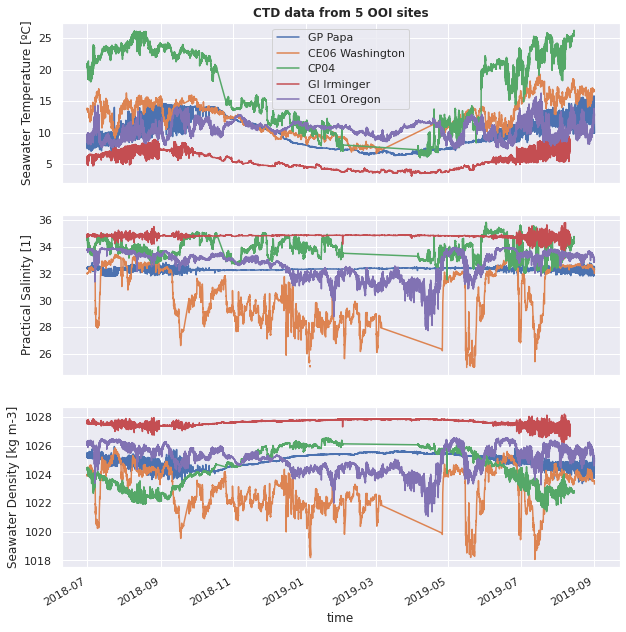

In [ ]:
fig,(ax1,ax2,ax3) = plt.subplots(3,1,sharex=True,figsize=(10,10))

data_gp03.ctdmo_seawater_temperature.plot(ax=ax1,label='GP Papa')
data_ce06.ctdbp_seawater_temperature.plot(ax=ax1,label='CE06 Washington')
data_cp04.temp.plot(ax=ax1,label='CP04')
data_gi03.ctdmo_seawater_temperature.plot(ax=ax1,label='GI Irminger')
data_ce01.ctdbp_seawater_temperature.plot(ax=ax1,label='CE01 Oregon')

data_gp03.practical_salinity.plot(ax=ax2)
data_ce06.practical_salinity.plot(ax=ax2)
data_cp04.practical_salinity.plot(ax=ax2)
data_gi03.practical_salinity.plot(ax=ax2)
data_ce01.practical_salinity.plot(ax=ax2)

data_gp03.density.plot(ax=ax3)
data_ce06.density.plot(ax=ax3)
data_cp04.density.plot(ax=ax3)
data_gi03.density.plot(ax=ax3)
data_ce01.density.plot(ax=ax3)

ax1.legend();
ax1.set_xlabel('');
ax2.set_xlabel('');
ax1.set_title('CTD data from 5 OOI sites',fontweight='bold');
fig.savefig('ctd_data.png')

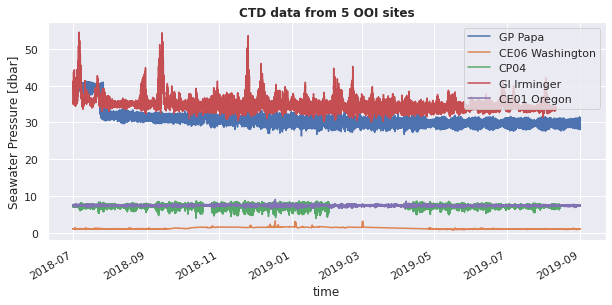

In [ ]:
fig,(ax1) = plt.subplots(1,1,sharex=True,figsize=(10,4))

data_gp03.ctdmo_seawater_pressure.plot(ax=ax1,label='GP Papa')
data_ce06.ctdbp_seawater_pressure.plot(ax=ax1,label='CE06 Washington')
data_cp04.pressure.plot(ax=ax1,label='CP04')
data_gi03.ctdmo_seawater_pressure.plot(ax=ax1,label='GI Irminger')
data_ce01.ctdbp_seawater_pressure.plot(ax=ax1,label='CE01 Oregon')
ax1.legend();
ax1.set_title('CTD data from 5 OOI sites',fontweight='bold');
fig.savefig('ctd_pressure.png')

## Average and Merge

In [ ]:
%%time
# Subset and Average Datasets
avgint='3H'
a = data_gp03[['practical_salinity','ctdmo_seawater_temperature','ctdmo_seawater_pressure','density']].load().resample(time=avgint).mean()
b = data_ce06[['practical_salinity','ctdbp_seawater_temperature','ctdbp_seawater_pressure','density']].load().resample(time=avgint).mean()
c = data_cp04[['practical_salinity','temp','pressure','density']].load().resample(time=avgint).mean()
d = data_gi03[['practical_salinity','ctdmo_seawater_temperature','ctdmo_seawater_pressure','density']].load().resample(time=avgint).mean()
e = data_ce01[['practical_salinity','ctdbp_seawater_temperature','ctdbp_seawater_pressure','density']].load().resample(time=avgint).mean()


CPU times: user 22.6 s, sys: 1.38 s, total: 23.9 s
Wall time: 22 s


In [ ]:
# Merge the datasets
a = a.rename({'practical_salinity':'GP Salinity',
              'ctdmo_seawater_temperature':'GP Temperature',
              'ctdmo_seawater_pressure':'GP Pressure',
              'density':'GP Density'})
b = b.rename({'practical_salinity':'CE06 Salinity',
              'ctdbp_seawater_temperature':'CE06 Temperature',
              'ctdbp_seawater_pressure':'CE06 Pressure',
              'density':'CE06 Density'})
c = c.rename({'practical_salinity':'CP04 Salinity',
              'temp':'CP04 Temperature',
              'pressure':'CP04 Pressure',
              'density':'CP04 Density'})
d = d.rename({'practical_salinity':'GI Salinity',
              'ctdmo_seawater_temperature':'GI Temperature',
              'ctdmo_seawater_pressure':'GI Pressure',
              'density':'GI Density'})
e = e.rename({'practical_salinity':'CE01 Salinity',
              'ctdbp_seawater_temperature':'CE01 Temperature',
              'ctdbp_seawater_pressure':'CE01 Pressure',
              'density':'CE01 Density'})

data = xr.merge([a,b,c,d,e]).to_dataframe()

# Print the first few rows
data.head()

,GP Salinity,GP Temperature,GP Pressure,GP Density,CE06 Salinity,CE06 Temperature,CE06 Pressure,CE06 Density,CP04 Salinity,CP04 Temperature,CP04 Pressure,CP04 Density,GI Salinity,GI Temperature,GI Pressure,GI Density,CE01 Salinity,CE01 Temperature,CE01 Pressure,CE01 Density
time,,,,,,,,,,,,,,,,,,,,
2018-07-01 00:00:00,32.412785,8.352516,39.895420,1025.376132,31.993941,13.783834,1.070490,1023.920655,34.614507,20.573376,7.267630,1024.352026,34.829779,5.926511,38.199441,1027.605491,33.782678,8.869045,7.500234,1026.222653
2018-07-01 03:00:00,32.428710,8.152242,39.146440,1025.414252,32.018194,13.793162,1.073865,1023.937525,34.757336,20.613270,7.259884,1024.450073,34.852398,5.729133,35.431045,1027.635231,33.747121,9.173739,7.485450,1026.146838
2018-07-01 06:00:00,32.415133,8.850941,39.662416,1025.301404,32.015206,13.739577,1.042802,1023.945941,34.868422,20.858950,7.272459,1024.468393,34.868006,5.367912,38.671859,1027.706929,33.779423,8.830151,7.483657,1026.226299
2018-07-01 09:00:00,32.408707,9.352878,40.439297,1025.222286,32.029654,13.520932,1.057890,1024.001061,34.627378,20.412766,7.271773,1024.404421,34.888939,5.101407,42.930397,1027.775954,33.799072,8.603555,7.536215,1026.277537
2018-07-01 12:00:00,32.414273,8.882426,39.866093,1025.297448,32.056775,13.294015,1.091198,1024.067353,34.191208,19.542110,7.263575,1024.301184,34.860135,5.706351,37.892070,1027.655925,33.764302,8.755236,7.478647,1026.226125


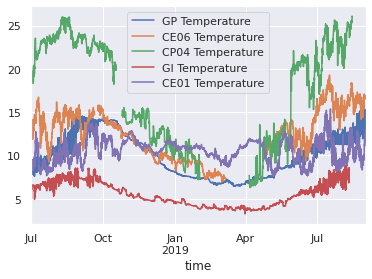

In [ ]:
# Test plot
data[['GP Temperature','CE06 Temperature','CP04 Temperature','GI Temperature','CE01 Temperature']].plot()

## Add Constant Density Calculations

Next, for this activitiy, we actually want 4 different calculations of Seawater Density for each instrument.
* Temp, Salinity, Density (already provided in the instrument file)
* Density holding T constant (using mean T from the record)
* Density holding S constant (using mean S from the record)
* Density holding T & S constant

In all cases, we will use the measured pressure values in the calculation.

To do this we will use the [python seawater library](https://pythonhosted.org/seawater/index.html). This library may be technically out of date, as the new [GSW-Python](https://github.com/TEOS-10/GSW-Python) library follows the TEOS-10 standard, but the differences are probably very minor for the purposes of this activity.

In [ ]:
! pip install seawater
import seawater as sw

  Created wheel for seawater: filename=seawater-3.3.4-cp36-none-any.whl size=26472 sha256=82fe6f582da9592fbb41d5c6f1643462777a0521f3e491a7ae1337d899ff2e4a
  Stored in directory: /root/.cache/pip/wheels/b1/bb/2c/f12b7223a9799f6cc146047f28edb0f82ffaab42614c4cb6dc
Successfully built seawater


In [ ]:
for site in ['GP','CE06','CP04','GI','CE01']:
  print('Mean Salinity at %s: %f'%(site,data[site+' Salinity'].mean()))
  print('Mean Temperature at %s: %f'%(site,data[site+' Temperature'].mean()))
  print('Mean Pressure at %s: %f'%(site,data[site+' Pressure'].mean()))

Mean Salinity at GP: 32.327527
Mean Temperature at GP: 9.988971
Mean Pressure at GP: 30.943377
Mean Salinity at CE06: 30.397531
Mean Temperature at CE06: 12.432159
Mean Pressure at CE06: 1.210903
Mean Salinity at CP04: 33.847823
Mean Temperature at CP04: 17.450733
Mean Pressure at CP04: 7.207343
Mean Salinity at GI: 34.810833
Mean Temperature at GI: 5.485052
Mean Pressure at GI: 34.925561
Mean Salinity at CE01: 32.699519
Mean Temperature at CE01: 10.520447
Mean Pressure at CE01: 7.408510


In [ ]:
# Add in recalculated Density
data['GP DenCS'] = sw.dens(data['GP Salinity'].mean(),data['GP Temperature'],data['GP Pressure'])
data['GP DenCT'] = sw.dens(data['GP Salinity'],data['GP Temperature'].mean(),data['GP Pressure'])
data['GP DenCTS'] = sw.dens(data['GP Salinity'].mean(),data['GP Temperature'].mean(),data['GP Pressure'])

data['CE06 DenCS'] = sw.dens(data['CE06 Salinity'].mean(),data['CE06 Temperature'],data['CE06 Pressure'])
data['CE06 DenCT'] = sw.dens(data['CE06 Salinity'],data['CE06 Temperature'].mean(),data['CE06 Pressure'])
data['CE06 DenCTS'] = sw.dens(data['CE06 Salinity'].mean(),data['CE06 Temperature'].mean(),data['CE06 Pressure'])

data['CP04 DenCS'] = sw.dens(data['CP04 Salinity'].mean(),data['CP04 Temperature'],data['CP04 Pressure'])
data['CP04 DenCT'] = sw.dens(data['CP04 Salinity'],data['CP04 Temperature'].mean(),data['CP04 Pressure'])
data['CP04 DenCTS'] = sw.dens(data['CP04 Salinity'].mean(),data['CP04 Temperature'].mean(),data['CP04 Pressure'])

data['GI DenCS'] = sw.dens(data['GI Salinity'].mean(),data['GI Temperature'],data['GI Pressure'])
data['GI DenCT'] = sw.dens(data['GI Salinity'],data['GI Temperature'].mean(),data['GI Pressure'])
data['GI DenCTS'] = sw.dens(data['GI Salinity'].mean(),data['GI Temperature'].mean(),data['GI Pressure'])

data['CE01 DenCS'] = sw.dens(data['CE01 Salinity'].mean(),data['CE01 Temperature'],data['CE01 Pressure'])
data['CE01 DenCT'] = sw.dens(data['CE01 Salinity'],data['CE01 Temperature'].mean(),data['CE01 Pressure'])
data['CE01 DenCTS'] = sw.dens(data['CE01 Salinity'].mean(),data['CE01 Temperature'].mean(),data['CE01 Pressure'])


In [ ]:
# Add in Mean value columnns
data['GP MeanS'] = data['GP Salinity'].mean()
data['GP MeanT'] = data['GP Temperature'].mean()

data['CE06 MeanS'] = data['CE06 Salinity'].mean()
data['CE06 MeanT'] = data['CE06 Temperature'].mean()

data['CP04 MeanS'] = data['CP04 Salinity'].mean()
data['CP04 MeanT'] = data['CP04 Temperature'].mean()

data['GI MeanS'] = data['GI Salinity'].mean()
data['GI MeanT'] = data['GI Temperature'].mean()

data['CE01 MeanS'] = data['CE01 Salinity'].mean()
data['CE01 MeanT'] = data['CE01 Temperature'].mean()

data.head()

,GP Salinity,GP Temperature,GP Pressure,GP Density,CE06 Salinity,CE06 Temperature,CE06 Pressure,CE06 Density,CP04 Salinity,CP04 Temperature,CP04 Pressure,CP04 Density,GI Salinity,GI Temperature,GI Pressure,GI Density,CE01 Salinity,CE01 Temperature,CE01 Pressure,CE01 Density,GP DenCS,GP DenCT,GP DenCTS,CE06 DenCS,CE06 DenCT,CE06 DenCTS,CP04 DenCS,CP04 DenCT,CP04 DenCTS,GI DenCS,GI DenCT,GI DenCTS,CE01 DenCS,CE01 DenCT,CE01 DenCTS,GP MeanS,GP MeanT,CE06 MeanS,CE06 MeanT,CP04 MeanS,CP04 MeanT,GI MeanS,GI MeanT,CE01 MeanS,CE01 MeanT
time,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2018-07-01 00:00:00,32.412785,8.352516,39.895420,1025.376132,31.993941,13.783834,1.070490,1023.920655,34.614507,20.573376,7.267630,1024.352026,34.829779,5.926511,38.199441,1027.605491,33.782678,8.869045,7.500234,1026.222653,1025.306598,1025.115292,1025.048795,1022.681499,1024.179170,1022.942454,1023.763306,1025.142580,1024.554932,1027.588695,1027.659020,1027.644025,1025.371638,1025.946149,1025.102034,32.327527,9.988971,30.397531,12.432159,33.847823,17.450733,34.810833,5.485052,32.699519,10.520447
2018-07-01 03:00:00,32.428710,8.152242,39.146440,1025.414252,32.018194,13.793162,1.073865,1023.937525,34.757336,20.613270,7.259884,1024.450073,34.852398,5.729133,35.431045,1027.635231,33.747121,9.173739,7.485450,1026.146838,1025.332748,1025.124313,1025.045395,1022.679651,1024.197980,1022.942469,1023.752625,1025.252056,1024.554810,1027.600938,1027.664137,1027.631239,1025.323990,1025.918366,1025.101967,32.327527,9.988971,30.397531,12.432159,33.847823,17.450733,34.810833,5.485052,32.699519,10.520447
2018-07-01 06:00:00,32.415133,8.850941,39.662416,1025.301404,32.015206,13.739577,1.042802,1023.945941,34.868422,20.858950,7.272459,1024.468393,34.868006,5.367912,38.671859,1027.706929,33.779423,8.830151,7.483657,1026.226299,1025.230039,1025.116066,1025.047737,1022.690203,1024.195525,1022.942329,1023.686829,1025.337289,1024.554932,1027.660515,1027.691456,1027.646207,1025.377564,1025.943537,1025.101959,32.327527,9.988971,30.397531,12.432159,33.847823,17.450733,34.810833,5.485052,32.699519,10.520447
2018-07-01 09:00:00,32.408707,9.352878,40.439297,1025.222286,32.029654,13.520932,1.057890,1024.001061,34.627378,20.412766,7.271773,1024.404421,34.888939,5.101407,42.930397,1027.775954,33.799072,8.603555,7.536215,1026.277537,1025.154859,1025.114580,1025.051264,1022.733607,1024.206790,1022.942397,1023.806152,1025.152466,1024.554932,1027.712184,1027.727688,1027.665873,1025.412450,1025.959091,1025.102197,32.327527,9.988971,30.397531,12.432159,33.847823,17.450733,34.810833,5.485052,32.699519,10.520447
2018-07-01 12:00:00,32.414273,8.882426,39.866093,1025.297448,32.056775,13.294015,1.091198,1024.067353,34.191208,19.542110,7.263575,1024.301184,34.860135,5.706351,37.892070,1027.655925,33.764302,8.755236,7.478647,1026.226125,1025.226110,1025.116319,1025.048662,1022.778238,1024.227957,1022.942548,1024.033936,1024.818056,1024.554810,1027.615149,1027.681625,1027.642606,1025.389057,1025.931728,1025.101936,32.327527,9.988971,30.397531,12.432159,33.847823,17.450733,34.810833,5.485052,32.699519,10.520447


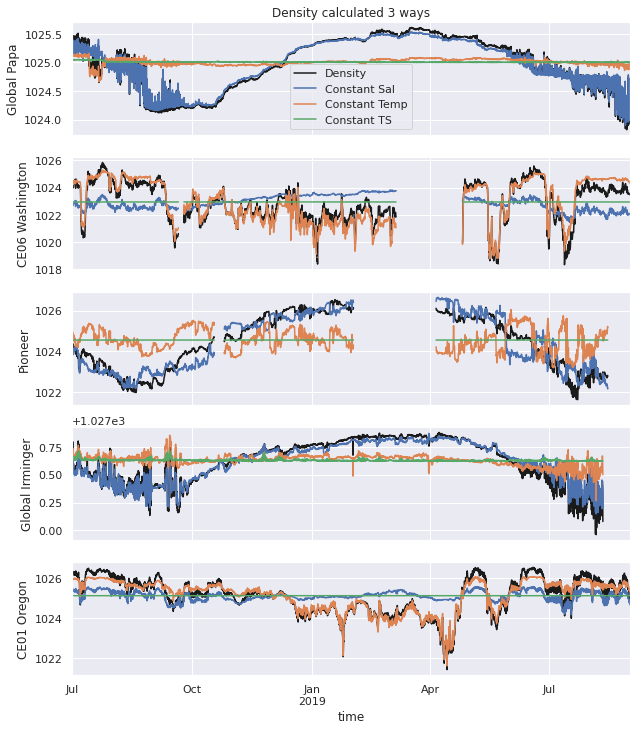

In [ ]:
# Let's plot all the Densities
fig,(ax1,ax2,ax3,ax4,ax5) = plt.subplots(5,1,sharex=True,figsize=(10,12))
data['GP Density'].plot(ax=ax1,label='Density',color='k')
data['GP DenCS'].plot(ax=ax1,label='Constant Sal')
data['GP DenCT'].plot(ax=ax1,label='Constant Temp')
data['GP DenCTS'].plot(ax=ax1,label='Constant TS')
ax1.set_ylabel('Global Papa')

data['CE06 Density'].plot(ax=ax2,label='Density',color='k')
data['CE06 DenCS'].plot(ax=ax2,label='Constant Sal')
data['CE06 DenCT'].plot(ax=ax2,label='Constant Temp')
data['CE06 DenCTS'].plot(ax=ax2,label='Constant TS')
ax2.set_ylabel('CE06 Washington')

data['CP04 Density'].plot(ax=ax3,label='Density',color='k')
data['CP04 DenCS'].plot(ax=ax3,label='Constant Sal')
data['CP04 DenCT'].plot(ax=ax3,label='Constant Temp')
data['CP04 DenCTS'].plot(ax=ax3,label='Constant TS')
ax3.set_ylabel('Pioneer')

data['GI Density'].plot(ax=ax4,label='Density',color='k')
data['GI DenCS'].plot(ax=ax4,label='Constant Sal')
data['GI DenCT'].plot(ax=ax4,label='Constant Temp')
data['GI DenCTS'].plot(ax=ax4,label='Constant TS')
ax4.set_ylabel('Global Irminger')

data['CE01 Density'].plot(ax=ax5,label='Density',color='k')
data['CE01 DenCS'].plot(ax=ax5,label='Constant Sal')
data['CE01 DenCT'].plot(ax=ax5,label='Constant Temp')
data['CE01 DenCTS'].plot(ax=ax5,label='Constant TS')
ax5.set_ylabel('CE01 Oregon')

ax1.set_xlabel('');
ax2.set_xlabel('');
ax3.set_xlabel('');
ax4.set_xlabel('');
ax1.legend();
ax1.set_title('Density calculated 3 ways');

fig.savefig('ctd_density.png')

In [ ]:
# Export to CSV
data.to_csv('density.csv')